In [1]:
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare
from scikit_posthocs import critical_difference_diagram, posthoc_conover_friedman
import matplotlib.pyplot as plt

# Level 0 significance test

In [2]:
file_path = 'results/ensemble/regression/decomp.csv'
data = pd.read_csv(file_path)
data = data[data.ensemble.str.contains('-25')]
data = data[data.ensemble.str.split('-').str[1] == '25'] # Filters level 0 tests
data.ensemble = data.ensemble.str.replace('-25', '').str.replace('_learning', '').str.replace('random_', 'rdm_')
data_pivot = data.pivot(index='dataset', columns='ensemble', values='expected_risk')

In [3]:
friedman_stat, p_value = friedmanchisquare(*[data_pivot[col] for col in data_pivot.columns])
friedman_stat, p_value

(95.98095238095243, 7.278558583562765e-18)

In [4]:
ranks = data_pivot.rank(axis=1, ascending=True, method='average')
average_ranks = ranks.mean().sort_values()

In [5]:
test_results = posthoc_conover_friedman(
    data,
    melted=True,
    block_col='dataset',
    group_col='ensemble',
    y_col='expected_risk'
)

c:\Users\tiago\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


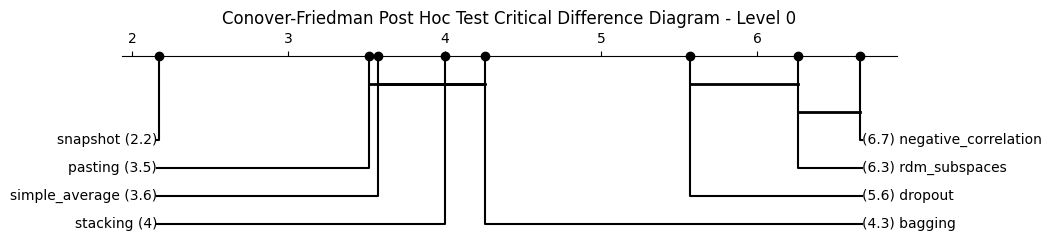

In [6]:
plt.rcParams['figure.figsize'] = [10, 2.4]
plt.title('Conover-Friedman Post Hoc Test Critical Difference Diagram - Level 0')
critical_difference_diagram(average_ranks, 
                            test_results, 
                            label_props={'color': 'black'}, 
                            crossbar_props={'color': 'black'},
                            elbow_props={'color': 'black'}
                            );
plt.savefig('figures/conover_level_0.pdf', bbox_inches='tight')

# Level 1 significance test

In [7]:
file_path = 'results/ensemble/regression/decomp.csv'
data = pd.read_csv(file_path)
data = data[data.ensemble.str.contains('-25')]
data = data[data.ensemble.str.split('-').str[1] != '25'] # Filter level 1 tests
data.ensemble = data.ensemble.str.replace('-25', '').str.replace('_learning', '').str.replace('random_', 'rdm_')
data_pivot = data.pivot(index='dataset', columns='ensemble', values='expected_risk')

In [8]:
friedman_stat, p_value = friedmanchisquare(*[data_pivot[col] for col in data_pivot.columns])
friedman_stat, p_value

(299.45677179962877, 1.0434953208772427e-51)

In [9]:
ranks = data_pivot.rank(axis=1, ascending=True, method='average')
average_ranks = ranks.mean().sort_values()

In [10]:
test_results = posthoc_conover_friedman(
    data,
    melted=True,
    block_col='dataset',
    group_col='ensemble',
    y_col='expected_risk'
)

c:\Users\tiago\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


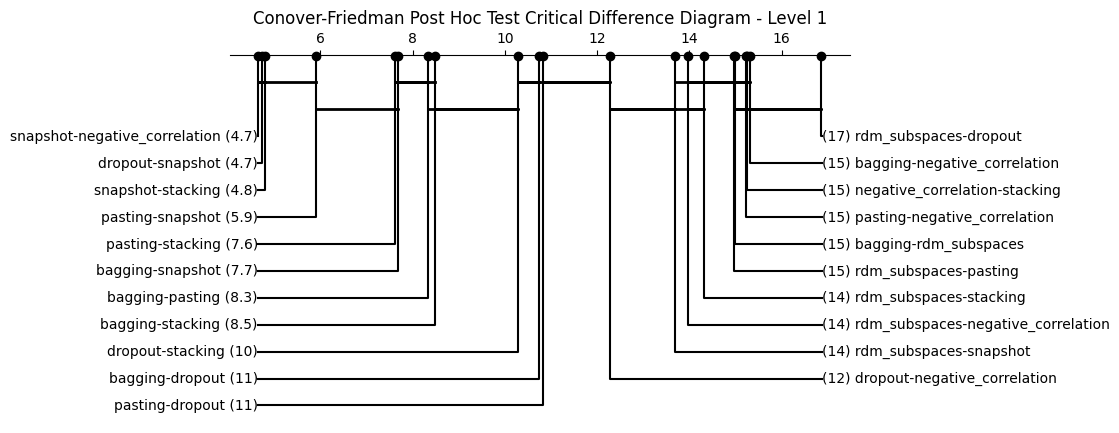

In [11]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.title('Conover-Friedman Post Hoc Test Critical Difference Diagram - Level 1')
critical_difference_diagram(average_ranks, 
                            test_results, 
                            label_props={'color': 'black'}, 
                            crossbar_props={'color': 'black'},
                            elbow_props={'color': 'black'}
                            );
plt.savefig('figures/conover_level_1.pdf', bbox_inches='tight')